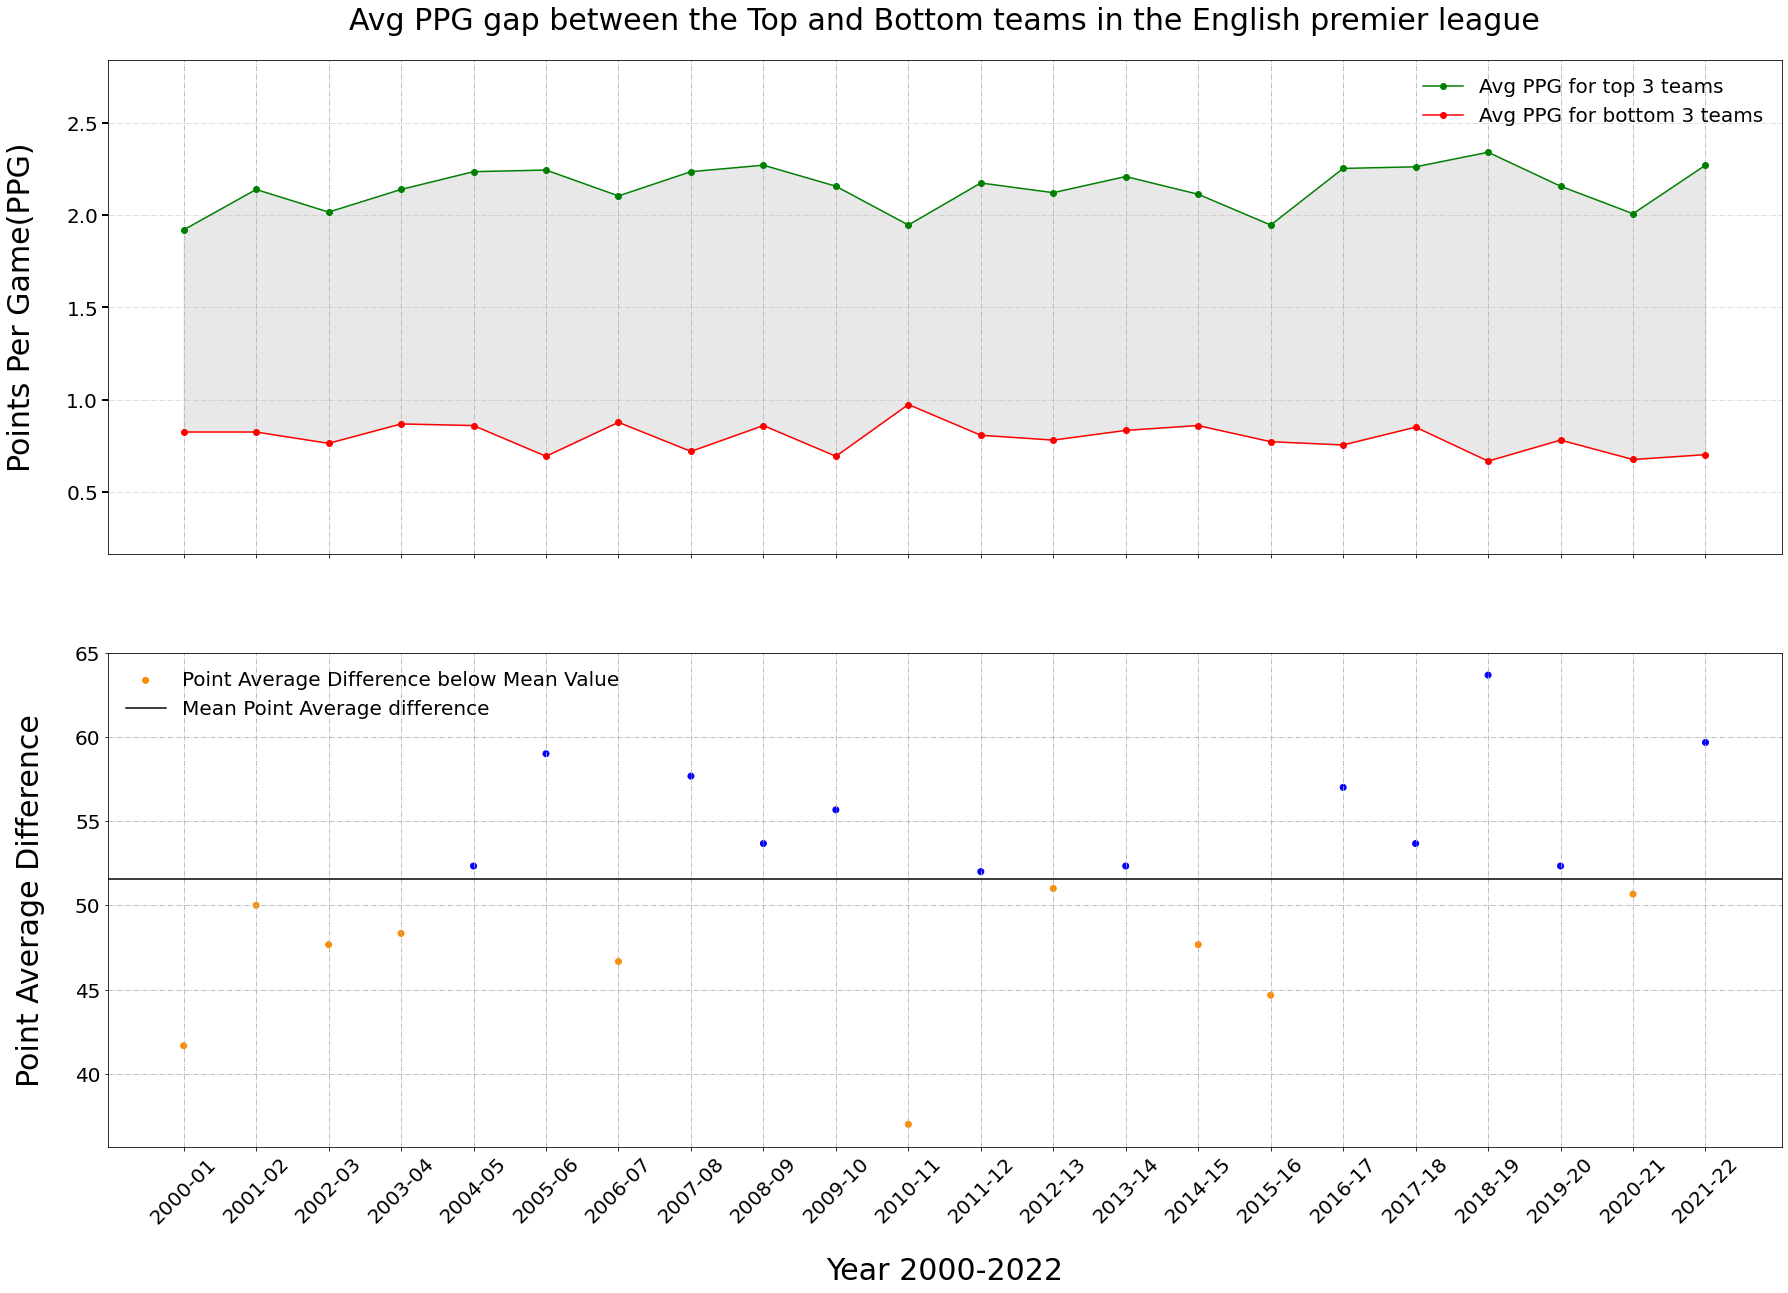

In [1]:
from tkinter import Y
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame


def clean():
  df = pd.read_csv('EPL Standings 2000-2022.csv')

  team_tops = []
  team_bottoms = []

  tops = [1,2,3]
  bottoms = [18,19,20]

  for item in tops:
      team = df.loc[df['Pos'] == item]
      team_tops.append(team)
  
  for item in bottoms:
      team = df.loc[df['Pos'] == item]
      team_bottoms.append(team)

  df_tops = pd.concat(team_tops, axis=0)
  df_bottoms = pd.concat(team_bottoms, axis=0)


  df_test1 = df_tops.groupby(['Season'], as_index = False).aggregate({'Pts':np.mean})
  df_test2 = df_bottoms.groupby(['Season'], as_index = False).aggregate({'Pts':np.mean})


  df_diff = DataFrame (columns=['Difference'])
  df_diff['Season'] = df_test1['Season']
  df_diff['Difference'] = df_test1['Pts'] - df_test2['Pts']
  mean_value = df_diff['Difference'].mean()

  color=[]

  for entry in df_diff['Difference'].values:
    if entry > mean_value:
      color.append("blue")
    else:
      color.append("darkorange")

  df_diff['color'] = color


  
  fig, axs = plt.subplots(2,figsize=(30, 20), sharex=True,frameon= False)

  plt.xlabel('Year 2000-2022', fontsize=30, labelpad=30)
  axs[0].set_ylabel('Points Per Game (PPG)', fontsize=30, labelpad=30)
  axs[0].plot(df_test1['Season'], df_test1['Pts']/38, '-o', color='green')
  axs[0].plot(df_test1['Season'], df_test2['Pts']/38, '-o', color='red')
  axs[0].fill_between(df_test1['Season'], df_test1['Pts']/38, df_test2['Pts']/38, color = 'lightgray' , alpha = 0.5)
  plt.xticks(rotation = 45) 

  axs[0].grid(True, linestyle='-.')

  axs[0].tick_params(axis = Y, direction='out', length=6, width=2,labelsize = 20, grid_alpha=0.5)

  axs[0].legend(['Avg PPG for top 3 teams', 'Avg PPG for bottom 3 teams'], loc= 'upper right', frameon= False, fontsize= 20)
  axs[0].margins(0.1,0.3)
  axs[0].set_title('Avg PPG gap between the Top and Bottom teams in the English premier league', fontsize=30, pad=30)
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  
 
  
  axs[1].scatter(df_diff['Season'], df_diff['Difference'], color=df_diff['color'])
  axs[1].axhline(mean_value, color = 'black')
  axs[1].set_ylabel('Point Average Difference', fontsize=30, labelpad=30)
  axs[1].legend(['Point Average Difference below Mean Value', 'Mean Point Average difference', 'PPG below AVG PPG'], loc= 'upper left', frameon= False, fontsize= 20)
  axs[1].grid(True, linestyle='-.')
  plt.xticks(rotation = 45) 


clean()